Nama: Feelouis Elfredo

Nim: 2502052726

Kelas: LA05

1. [LO 1, LO 2, LO 3, LO4 45 poin] You are an AI Engineer at a company working in the finance
sector. Your team has been tasked with predicting the stock performance of Company "X". The
provided dataset, stored as "X.csv", contains several important details about each column. For
this task, you will be focusing solely on the 'Date' and 'Close' columns. Here are the key
considerations you need to keep in mind while developing the Deep Learning architecture:

## 1. Data Import and Exploration
These lines import necessary libraries for data analysis and visualization

In [3]:
#import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Here, a dataset is loaded from a CSV file ('X.csv') using Pandas. Basic exploratory data analysis (EDA) is performed, including displaying the first 5 rows, checking data types, examining missing values, dropping rows with missing values, and providing descriptive statistics.

In [4]:
#read n show data
dt = pd.read_csv('X.csv')
dt

Date         Open         High          Low        Close  \
0     2005-09-29   432.588074   436.787964   407.388763   432.588074   
1     2005-09-30   457.787384   457.787384   432.588074   457.787384   
2     2005-10-03   470.387024   474.586914   440.987854   470.387024   
3     2005-10-04   474.586914   482.986694   466.187164   474.586914   
4     2005-10-05   482.986694   482.986694   466.187164   482.986694   
...          ...          ...          ...          ...          ...   
3803  2021-01-28  2470.000000  2570.000000  2380.000000  2380.000000   
3804  2021-01-29  2370.000000  2440.000000  2220.000000  2220.000000   
3805  2021-02-01  2090.000000  2640.000000  2070.000000  2600.000000   
3806  2021-02-02  2600.000000  2630.000000  2420.000000  2420.000000   
3807  2021-02-03  2390.000000  2520.000000  2290.000000  2330.000000   

        Adj Close        Volume  
0      304.904572  7.618067e+07  
1      322.666016  1.054940e+08  
2      331.546692  5.971296e+07  
3      334.506927  5.623667e+07  
4      340.427429  3.131932e+07  
...           ...           ...  
3803  2380.000000  7.318549e+08  
3804  2220.000000  4.503212e+08  
3805  2600.000000  2.186653e+09  
3806  2420.000000  9.424343e+08  
3807  2330.000000  9.480310e+08  

[3808 rows x 7 columns]

In [5]:
#showing 5 first data
dt.head()

Date        Open        High         Low       Close   Adj Close  \
0  2005-09-29  432.588074  436.787964  407.388763  432.588074  304.904572   
1  2005-09-30  457.787384  457.787384  432.588074  457.787384  322.666016   
2  2005-10-03  470.387024  474.586914  440.987854  470.387024  331.546692   
3  2005-10-04  474.586914  482.986694  466.187164  474.586914  334.506927   
4  2005-10-05  482.986694  482.986694  466.187164  482.986694  340.427429   

        Volume  
0   76180670.0  
1  105493978.0  
2   59712955.0  
3   56236668.0  
4   31319315.0

In [6]:
#showing data type
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3808 non-null   object 
 1   Open       3807 non-null   float64
 2   High       3807 non-null   float64
 3   Low        3807 non-null   float64
 4   Close      3807 non-null   float64
 5   Adj Close  3807 non-null   float64
 6   Volume     3807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 208.4+ KB


In [7]:
#examinig missing values
dt.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [8]:
#dropping missing value
dt = dt.dropna()

In [9]:
#checking the missing value once again
dt.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#descriptive overview of the dataset
dt.describe()

Open         High          Low        Close    Adj Close  \
count  3807.000000  3807.000000  3807.000000  3807.000000  3807.000000   
mean   1207.953241  1230.793315  1185.663883  1207.159945  1047.459832   
std     664.882117   679.635933   649.243280   665.202070   495.685067   
min     290.000000   294.000000   285.000000   287.000000   280.434296   
25%     768.578796   780.000000   751.779297   765.000000   713.299744   
50%     957.573608   978.573059   945.000000   957.573608   902.836792   
75%    1595.956055  1621.155273  1570.756714  1595.956055  1347.260193   
max    4409.878418  4451.877441  4115.886719  4241.883301  3190.000000   

             Volume  
count  3.807000e+03  
mean   6.858102e+07  
std    1.308133e+08  
min    0.000000e+00  
25%    1.420484e+07  
50%    3.421840e+07  
75%    7.306722e+07  
max    2.186653e+09

## 2. Box Plots
A subplot with 6 rows and 1 column is created for box plots.

Box plots are created for each numerical column in the dataset to visualize the distribution and identify potential outliers.

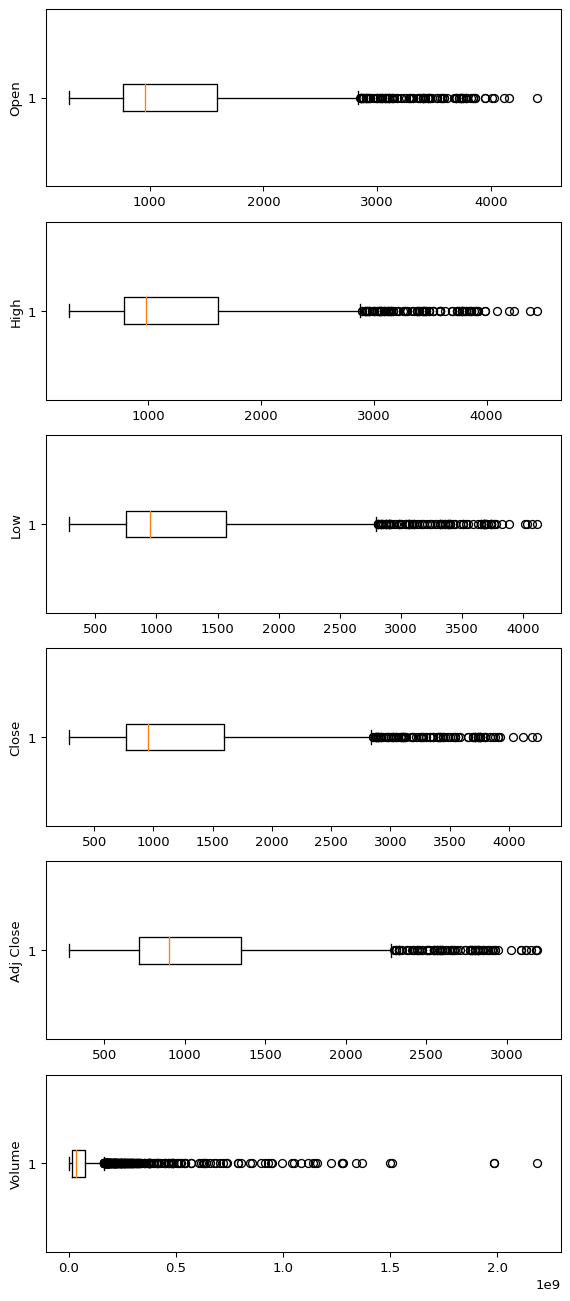

In [11]:
# Box Plots
fig, axs = plt.subplots(6, 1,dpi=95, figsize=(7,17))
i = 0
for col in dt.columns[1::]:
    axs[i].boxplot(dt[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

## 3. Outlier Remover
Outliers are identified and removed from each numerical column using the interquartile range (IQR) method.

In [12]:
# Identify the quartiles
q1, q3 = np.percentile(dt['Open'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = dt[(dt['Open'] >= lower_bound)
                & (dt['Open'] <= upper_bound)]

# Identify the quartiles
q1, q3 = np.percentile(dt['High'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = dt[(dt['High'] >= lower_bound)
                & (dt['High'] <= upper_bound)]

# Identify the quartiles
q1, q3 = np.percentile(dt['Low'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = dt[(dt['Low'] >= lower_bound)
                & (dt['Low'] <= upper_bound)]

# Identify the quartiles
q1, q3 = np.percentile(dt['Close'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = dt[(dt['Close'] >= lower_bound)
                & (dt['Close'] <= upper_bound)]

# Identify the quartiles
q1, q3 = np.percentile(dt['Adj Close'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = dt[(dt['Adj Close'] >= lower_bound)
                & (dt['Adj Close'] <= upper_bound)]

# Identify the quartiles
q1, q3 = np.percentile(dt['Volume'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = dt[(dt['Volume'] >= lower_bound)
                & (dt['Volume'] <= upper_bound)]


## 4. Correlation Matrix

A correlation matrix is computed and visualized as a heatmap to show the pairwise correlation between different columns.

<ipython-input-13-86aee8ed15f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dt.corr()
<ipython-input-13-86aee8ed15f9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr(), annot=True, fmt= '.2f')


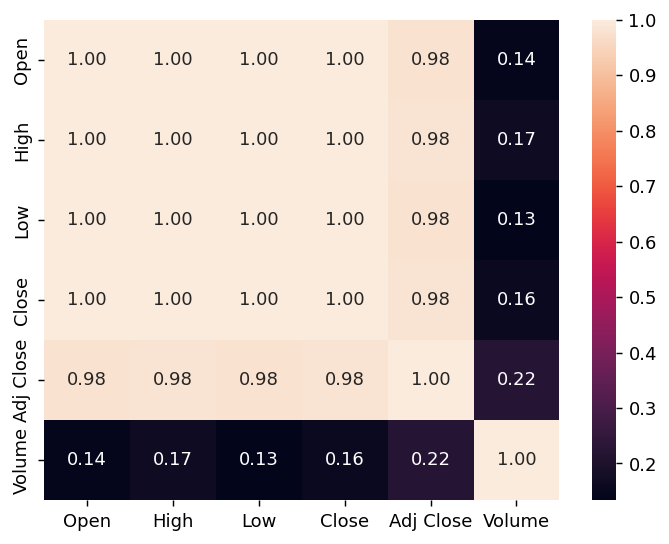

In [13]:
#correlation
corr = dt.corr()

plt.figure(dpi=130)
sns.heatmap(dt.corr(), annot=True, fmt= '.2f')
plt.show()

## 5. Data Preprocessing for Time Series Forecasting

The 'Close' column is scaled using Min-Max scaling.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dt['Close'] = scaler.fit_transform(dt[['Close']])
dt

<ipython-input-14-bcf8a71baecd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Close'] = scaler.fit_transform(dt[['Close']])


Date         Open         High          Low     Close  \
0     2005-09-29   432.588074   436.787964   407.388763  0.036812   
1     2005-09-30   457.787384   457.787384   432.588074  0.043184   
2     2005-10-03   470.387024   474.586914   440.987854  0.046370   
3     2005-10-04   474.586914   482.986694   466.187164  0.047432   
4     2005-10-05   482.986694   482.986694   466.187164  0.049556   
...          ...          ...          ...          ...       ...   
3803  2021-01-28  2470.000000  2570.000000  2380.000000  0.529219   
3804  2021-01-29  2370.000000  2440.000000  2220.000000  0.488763   
3805  2021-02-01  2090.000000  2640.000000  2070.000000  0.584847   
3806  2021-02-02  2600.000000  2630.000000  2420.000000  0.539333   
3807  2021-02-03  2390.000000  2520.000000  2290.000000  0.516577   

        Adj Close        Volume  
0      304.904572  7.618067e+07  
1      322.666016  1.054940e+08  
2      331.546692  5.971296e+07  
3      334.506927  5.623667e+07  
4      340.427429  3.131932e+07  
...           ...           ...  
3803  2380.000000  7.318549e+08  
3804  2220.000000  4.503212e+08  
3805  2600.000000  2.186653e+09  
3806  2420.000000  9.424343e+08  
3807  2330.000000  9.480310e+08  

[3807 rows x 7 columns]

a. [LO 1, LO 2, LO 3, LO4 5 point] Before delving into the data analysis, it is essential to
conduct an initial exploration of the dataset to comprehend the challenges inherent
within it. The provided dataset is a time series, and it necessitates appropriate
preprocessing to resolve any issues that may be present. The time series data should
then be divided into two segments: input and output. This division should be structured
with a window size of 5 and a horizon of 1, effectively setting up the framework for
subsequent analysis.

Time windows are created for time series forecasting, where each window contains the previous 5 'Close' values as input features and the next 'Close' value as the target variable.

In [15]:
def create_windows(df):
  x = []
  y = []
  for i in range(5, len(df)):
    x.append(df.iloc[i - 5:i, 0])
    y.append(df.iloc[i, 0])
  return (np.array(x), np.array(y))

x_data, y_data = create_windows(dt[['Close']])
print(x_data.shape, y_data.shape)
print(y_data)

(3802, 5) (3802,)
[0.04530783 0.04636977 0.04530783 ... 0.58484659 0.53933323 0.51657656]


b. [LO 1, LO 2, LO 3, LO4 5 point] Separate data into train, validation and test (80:10:10)

The data is split into training, validation, and testing sets for time series forecasting. The sets are sorted by the 'Date' column.

In [16]:
#Reshaping the data into 80:10:10
from sklearn.model_selection import train_test_split

dt = dt.sort_values(by='Date')

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size = 0.2, shuffle = False)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, shuffle = False)

In [17]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


print("Training set shape X:{}, Y:{}".format(x_train.shape, y_train.shape))
print("Validation set shape X:{}, Y:{}".format(x_val.shape, y_train.shape))
print("Testing set shape X:{}, Y:{}".format(x_test.shape, y_train.shape))

Training set shape X:(3041, 5, 1), Y:(3041,)
Validation set shape X:(380, 5, 1), Y:(3041,)
Testing set shape X:(381, 5, 1), Y:(3041,)


c. [LO 1, LO 2, LO 3, LO 4 10 point] Create base architecture based on Table 1

## 6. Building and Training Neural Network Models

A sequential neural network model with Bidirectional GRU layers, Dropout, and Dense layers is defined and trained using the training data.

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional
model = Sequential()
model.add(Bidirectional(GRU(units=128, return_sequences=True), input_shape=(5, 1)))
model.add(Bidirectional(GRU(units=64, return_sequences=True))),
model.add(Bidirectional(GRU(units=32, return_sequences=False))),
model.add(Dropout(0.1))
model.add(Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 5, 256)            100608    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 5, 128)            123648    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [21]:
import tensorflow as tf
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience = 20,
        restore_best_weights = True
    )
]

In [22]:
history = model.fit(x_train, y_train, epochs = 50, callbacks = callbacks, batch_size = 16, validation_data = (x_val, y_val), verbose=1)

Epoch 1/50
191/191 [==============================] - 20s 43ms/step - loss: 0.0021 - mean_absolute_error: 0.0261 - val_loss: 6.3580e-05 - val_mean_absolute_error: 0.0060
Epoch 2/50
191/191 [==============================] - 4s 21ms/step - loss: 7.3460e-04 - mean_absolute_error: 0.0179 - val_loss: 2.3878e-04 - val_mean_absolute_error: 0.0137
Epoch 3/50
191/191 [==============================] - 6s 30ms/step - loss: 7.0824e-04 - mean_absolute_error: 0.0181 - val_loss: 1.3842e-04 - val_mean_absolute_error: 0.0098
Epoch 4/50
191/191 [==============================] - 4s 21ms/step - loss: 5.6388e-04 - mean_absolute_error: 0.0159 - val_loss: 9.2860e-05 - val_mean_absolute_error: 0.0082
Epoch 5/50
191/191 [==============================] - 4s 21ms/step - loss: 6.2499e-04 - mean_absolute_error: 0.0172 - val_loss: 7.6871e-05 - val_mean_absolute_error: 0.0069
Epoch 6/50
191/191 [==============================] - 6s 30ms/step - loss: 4.8903e-04 - mean_absolute_error: 0.0149 - val_loss: 4.5863e-05

d. [LO 1, LO 2, LO 3, LO 4 10 point] Adding Sequential Self-Attention Mechanism and
explain how the sequential self-attention mechanism works

In [23]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=161cebd2581a4a8f3b97ee4519d39daa04b0fd4d9158e3aaa81063fe63f63c90
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


A second model is defined with Bidirectional GRU layers, Self Attention, Dropout, and Dense layers, and it is trained using the training data.

In [24]:
from keras.layers import MultiHeadAttention, Flatten
import keras
from keras_self_attention import SeqSelfAttention
newModel = Sequential()
newModel.add(Bidirectional(GRU(units=128, return_sequences=True), input_shape=(5, 1)))
newModel.add(SeqSelfAttention(attention_activation='sigmoid'))
newModel.add(Bidirectional(GRU(units=64, return_sequences=True))),
newModel.add(SeqSelfAttention(attention_activation='sigmoid')),
newModel.add(Bidirectional(GRU(units=32, return_sequences=False))),
newModel.add(Dropout(0.1))
newModel.add(Flatten())
newModel.add(Dense(128))
newModel.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [25]:
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 5, 256)            100608    
 onal)                                                           
                                                                 
 seq_self_attention (SeqSel  (None, 5, 256)            16449     
 fAttention)                                                     
                                                                 
 bidirectional_4 (Bidirecti  (None, 5, 128)            123648    
 onal)                                                           
                                                                 
 seq_self_attention_1 (SeqS  (None, 5, 128)            8257      
 elfAttention)                                                   
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)               

In [26]:
newModel.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [27]:
history_new = newModel.fit(x_train, y_train, epochs = 50, callbacks = callbacks, batch_size = 16, validation_data = (x_val, y_val), verbose=1)

Epoch 1/50
191/191 [==============================] - 42s 61ms/step - loss: 0.0020 - mean_absolute_error: 0.0241 - val_loss: 9.7347e-05 - val_mean_absolute_error: 0.0077
Epoch 2/50
191/191 [==============================] - 6s 33ms/step - loss: 6.2360e-04 - mean_absolute_error: 0.0165 - val_loss: 2.6380e-04 - val_mean_absolute_error: 0.0143
Epoch 3/50
191/191 [==============================] - 5s 26ms/step - loss: 6.2383e-04 - mean_absolute_error: 0.0169 - val_loss: 8.1474e-05 - val_mean_absolute_error: 0.0069
Epoch 4/50
191/191 [==============================] - 6s 34ms/step - loss: 6.6125e-04 - mean_absolute_error: 0.0170 - val_loss: 2.8792e-04 - val_mean_absolute_error: 0.0152
Epoch 5/50
191/191 [==============================] - 5s 25ms/step - loss: 5.6112e-04 - mean_absolute_error: 0.0162 - val_loss: 2.0256e-04 - val_mean_absolute_error: 0.0127
Epoch 6/50
191/191 [==============================] - 5s 24ms/step - loss: 5.6160e-04 - mean_absolute_error: 0.0164 - val_loss: 1.6850e-04

## 7. Model Evaluation and Comparison
Training history plots are created to compare the loss and mean absolute error for both models.

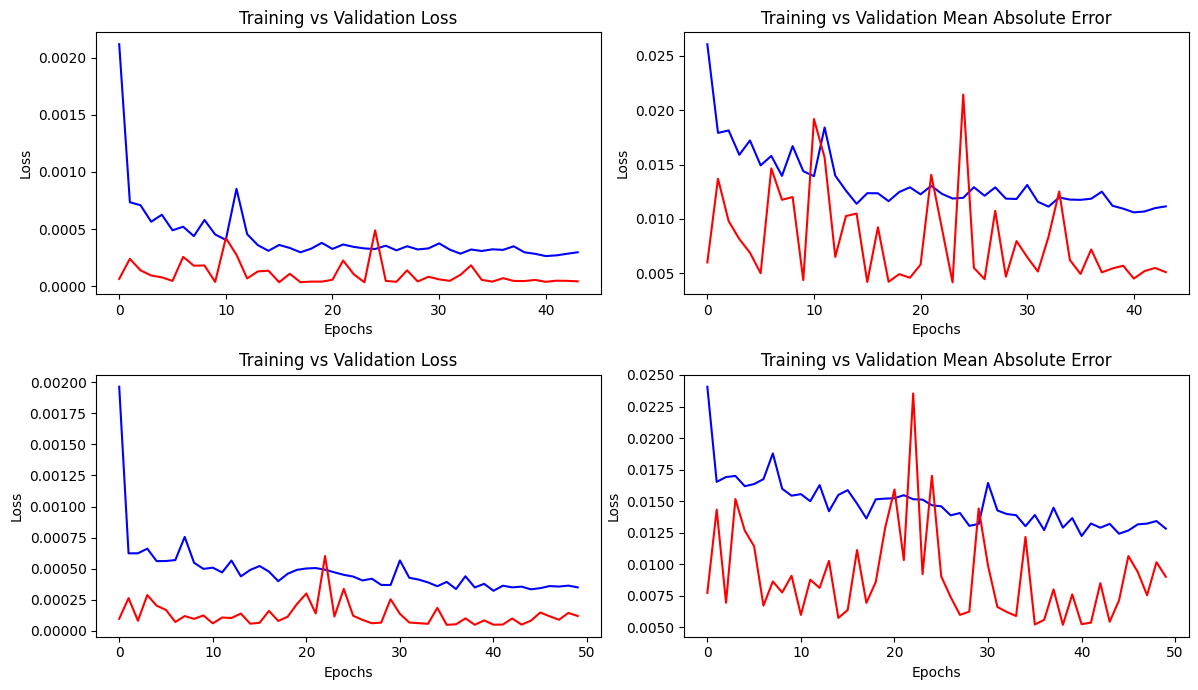

In [28]:
# Plotting training history for loss and mean absolute error

fig, ax = plt.subplots(2, 2, figsize=(12, 7))

# Plotting Training vs Validation Loss
ax[0, 0].plot(history.history['loss'], label='Training', color='blue')
ax[0, 0].plot(history.history['val_loss'], label='Validation', color='red')
ax[0, 0].set(xlabel='Epochs', ylabel='Loss', title='Training vs Validation Loss')

# Plotting Training vs Validation Mean Absolute Error
ax[0, 1].plot(history.history['mean_absolute_error'], label='Training', color='blue')
ax[0, 1].plot(history.history['val_mean_absolute_error'], label='Validation', color='red')
ax[0, 1].set(xlabel='Epochs', ylabel='Loss', title='Training vs Validation Mean Absolute Error')

# Plotting Training vs Validation Loss for the second model
ax[1, 0].plot(history_new.history['loss'], label='Training', color='blue')
ax[1, 0].plot(history_new.history['val_loss'], label='Validation', color='red')
ax[1, 0].set(xlabel='Epochs', ylabel='Loss', title='Training vs Validation Loss')

# Plotting Training vs Validation Mean Absolute Error for the second model
ax[1, 1].plot(history_new.history['mean_absolute_error'], label='Training', color='blue')
ax[1, 1].plot(history_new.history['val_mean_absolute_error'], label='Validation', color='red')
ax[1, 1].set(xlabel='Epochs', ylabel='Loss', title='Training vs Validation Mean Absolute Error')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


Model predictions are obtained and then inverted back to the original scale using Min-Max scaling.

In [29]:
predict = model.predict(x_test)
predict[:5]

12/12 [==============================] - 2s 7ms/step


array([[0.15472227],
       [0.1661645 ],
       [0.16525987],
       [0.17026044],
       [0.16692196]], dtype=float32)

In [30]:
predict = scaler.inverse_transform(predict)
predict[:5]

array([[898.9085 ],
       [944.1612 ],
       [940.58344],
       [960.36017],
       [947.15686]], dtype=float32)

In [31]:
predict2 = newModel.predict(x_test)
predict2 = scaler.inverse_transform(predict2)
predict2[:5]

12/12 [==============================] - 2s 10ms/step


array([[855.947  ],
       [883.89246],
       [900.9298 ],
       [918.32837],
       [921.9321 ]], dtype=float32)

In [32]:
dt['Close'] = scaler.inverse_transform(dt[['Close']])
dt

Date         Open         High          Low        Close  \
0     2005-09-29   432.588074   436.787964   407.388763   432.588074   
1     2005-09-30   457.787384   457.787384   432.588074   457.787384   
2     2005-10-03   470.387024   474.586914   440.987854   470.387024   
3     2005-10-04   474.586914   482.986694   466.187164   474.586914   
4     2005-10-05   482.986694   482.986694   466.187164   482.986694   
...          ...          ...          ...          ...          ...   
3803  2021-01-28  2470.000000  2570.000000  2380.000000  2380.000000   
3804  2021-01-29  2370.000000  2440.000000  2220.000000  2220.000000   
3805  2021-02-01  2090.000000  2640.000000  2070.000000  2600.000000   
3806  2021-02-02  2600.000000  2630.000000  2420.000000  2420.000000   
3807  2021-02-03  2390.000000  2520.000000  2290.000000  2330.000000   

        Adj Close        Volume  
0      304.904572  7.618067e+07  
1      322.666016  1.054940e+08  
2      331.546692  5.971296e+07  
3      334.506927  5.623667e+07  
4      340.427429  3.131932e+07  
...           ...           ...  
3803  2380.000000  7.318549e+08  
3804  2220.000000  4.503212e+08  
3805  2600.000000  2.186653e+09  
3806  2420.000000  9.424343e+08  
3807  2330.000000  9.480310e+08  

[3807 rows x 7 columns]

In [33]:
data = pd.read_csv('X.csv')
data

Date         Open         High          Low        Close  \
0     2005-09-29   432.588074   436.787964   407.388763   432.588074   
1     2005-09-30   457.787384   457.787384   432.588074   457.787384   
2     2005-10-03   470.387024   474.586914   440.987854   470.387024   
3     2005-10-04   474.586914   482.986694   466.187164   474.586914   
4     2005-10-05   482.986694   482.986694   466.187164   482.986694   
...          ...          ...          ...          ...          ...   
3803  2021-01-28  2470.000000  2570.000000  2380.000000  2380.000000   
3804  2021-01-29  2370.000000  2440.000000  2220.000000  2220.000000   
3805  2021-02-01  2090.000000  2640.000000  2070.000000  2600.000000   
3806  2021-02-02  2600.000000  2630.000000  2420.000000  2420.000000   
3807  2021-02-03  2390.000000  2520.000000  2290.000000  2330.000000   

        Adj Close        Volume  
0      304.904572  7.618067e+07  
1      322.666016  1.054940e+08  
2      331.546692  5.971296e+07  
3      334.506927  5.623667e+07  
4      340.427429  3.131932e+07  
...           ...           ...  
3803  2380.000000  7.318549e+08  
3804  2220.000000  4.503212e+08  
3805  2600.000000  2.186653e+09  
3806  2420.000000  9.424343e+08  
3807  2330.000000  9.480310e+08  

[3808 rows x 7 columns]

In [34]:
y_true = np.array(dt['Close'].tail(381))
y_true

array([ 950.,  940.,  960.,  940.,  945.,  930.,  890.,  895.,  935.,
        935.,  925.,  900.,  860.,  940., 1005., 1020., 1065., 1035.,
       1065., 1110., 1120., 1120., 1085., 1050., 1070., 1040., 1015.,
       1030., 1020., 1050., 1055., 1070., 1170., 1110., 1100., 1100.,
       1075., 1120., 1130., 1125., 1120., 1070., 1050., 1050., 1065.,
       1045., 1065., 1055., 1015., 1010., 1015.,  990.,  975.,  955.,
        920.,  965.,  960.,  955.,  930.,  990.,  995., 1015., 1000.,
        985.,  960.,  955.,  935.,  925.,  930.,  955.,  975.,  955.,
        915.,  925.,  930.,  890.,  855.,  840.,  835.,  850.,  845.,
        835.,  830.,  820.,  820.,  815.,  825.,  820.,  835.,  825.,
        815.,  810.,  815.,  810.,  780.,  750.,  750.,  790.,  775.,
        785.,  805.,  810.,  825.,  825.,  825.,  835.,  850.,  865.,
        860.,  830.,  835.,  830.,  825.,  840.,  835.,  840.,  840.,
        850.,  885.,  875.,  905.,  880.,  885.,  870.,  850.,  835.,
        845.,  840.,

e. [LO 1, LO 2 & LO 3, LO 4 10 points] Please proceed to evaluate the architecture outlined
above on the test set, utilizing evaluation metrics that are congruent with the
architecture specified in number 1c and 1d. Include a justification for the choice of these
evaluation m

The R-squared (R2) score is calculated to evaluate the performance of Model 1.

In [35]:
from sklearn.metrics import r2_score
r2_score(y_true, predict)

0.9853693335359266

d. [LO 1, LO 2 & LO 3, LO 4 5 points] Create a line chart that displays a comparison between
the prediction results from models 1d and 1c, and the actual values

A plot is created to compare the actual values with the predictions of both Model 1 and Model 2.

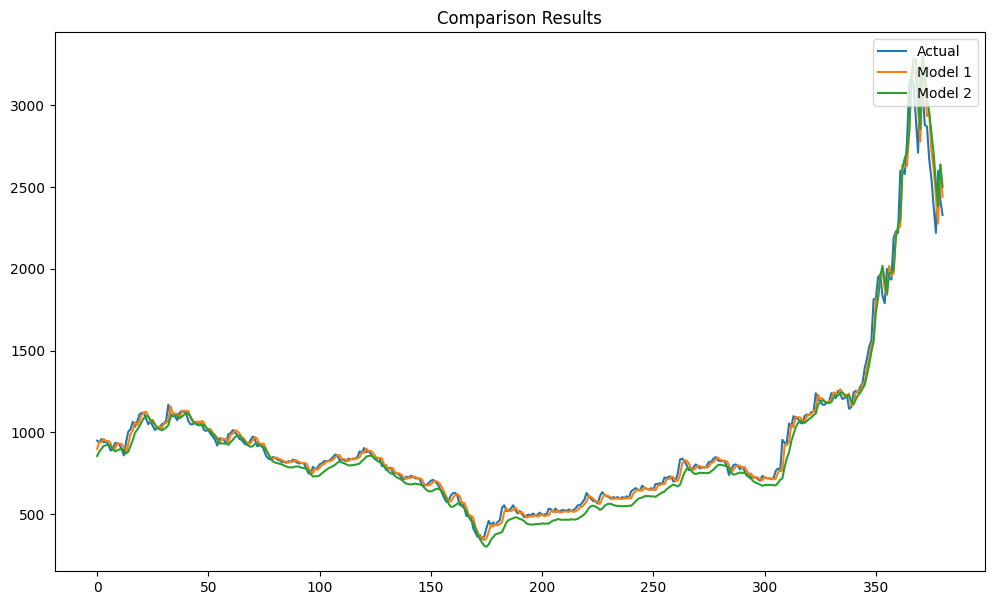

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(y_true, label='Actual')
plt.plot(predict, label='Model 1')
plt.plot(predict2, label='Model 2')
plt.legend(loc='upper right')
plt.title('Comparison Results')
plt.show()